## Eleições 2022

#### Notebook para analisar rapidamente os dados disponibilizados pelo TSE das eleições de 2022

Portal de Dados Abertos do TSE: https://dadosabertos.tse.jus.br/

In [193]:
# rodar para deixar as células da largura da janela do navegador
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [194]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
sep = ';' # separador do arquivo CSV
dec = ',' # separador de decimais
enc = 'latin1' # codificação dos caracteres

In [75]:
# arquivos CSV
f_vot_secao = './tse_2022/votacao_secao_2022_BR/votacao_secao_2022_BR.csv'
f_hist_pres_1t = './tse_2022/Historico_Totalizacao_Presidente_BR_1T_2022/Historico_Totalizacao_Presidente_BR_1T_2022.csv'
f_hist_pres_2t = './tse_2022/Historico_Totalizacao_Presidente_BR_2T_2022/Historico_Totalizacao_Presidente_BR_2T_2022.csv'


### Primeiro turno - Totalização 

In [5]:
# dataframe totalização primeiro turno
df_tot_1t = pd.read_csv(f_hist_pres_1t, sep=sep, encoding=enc, decimal=dec)
df_tot_1t.columns

Index(['DT_TOTALIZACAO     ', 'QT_SECOES_TOTAL', 'QT_APTOS_TOTAL',
       'QT_SECOES_TOT', 'QT_SECOES_TOT_ACUMULADO',
       'PE_SECOES_TOT_ACUMULADO                      ', 'QT_APTOS_TOT',
       'QT_APTOS_TOT_ACUMULADO', 'QT_VOTOS_TOTAL', 'QT_VOTOS_TOTAL_ACUMULADO',
       'QT_VOTOS_CONCORRENTES', 'QT_VOTOS_CONCORRENTES_ACUMULADO',
       'CIRO_GOMES_QT_VOTOS_TOT', 'CIRO_GOMES_QT_VOTOS_TOT_ACUMULADO',
       'CIRO_GOMES_PE_VOTOS_TOT_ACUMULADO            ', 'LULA_QT_VOTOS_TOT',
       'LULA_QT_VOTOS_TOT_ACUMULADO',
       'LULA_PE_VOTOS_TOT_ACUMULADO                  ',
       'PADRE_KELMON_QT_VOTOS_TOT', 'PADRE_KELMON_QT_VOTOS_TOT_ACUMULADO',
       'PADRE_KELMON_PE_VOTOS_TOT_ACUMULADO          ',
       'SIMONE_TEBET_QT_VOTOS_TOT', 'SIMONE_TEBET_QT_VOTOS_TOT_ACUMULADO',
       'SIMONE_TEBET_PE_VOTOS_TOT_ACUMULADO          ', 'VERA_QT_VOTOS_TOT',
       'VERA_QT_VOTOS_TOT_ACUMULADO',
       'VERA_PE_VOTOS_TOT_ACUMULADO                  ',
       'SOFIA_MANZANO_QT_VOTOS_TOT', 'SOFIA_M

In [8]:
df_tot_1t['data_hora'] = pd.to_datetime(df_tot_1t['DT_TOTALIZACAO     '], format='%d/%m/%Y %H:%M:%S') #
df_tot_1t.set_index('data_hora', inplace=True)

In [11]:
df_tot_1t.index.min()

Timestamp('2022-10-02 17:04:47')

In [12]:
df_tot_1t.index.max()

Timestamp('2022-10-04 10:27:34')

In [10]:
df_tot_1t.index.max() - df_tot_1t.index.min()

Timedelta('1 days 17:22:47')

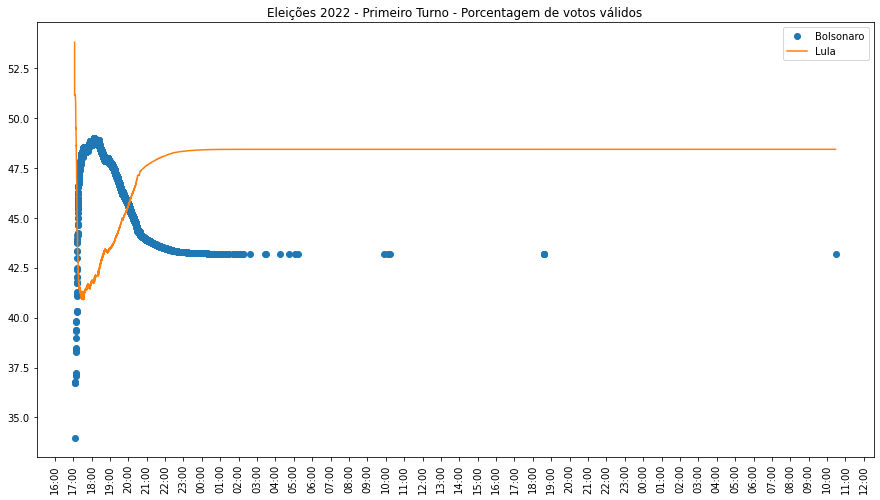

In [195]:
df = df_tot_1t
y1 = 'JAIR_BOLSONARO_PE_VOTOS_TOT_ACUMULADO        '
y2 = 'LULA_PE_VOTOS_TOT_ACUMULADO                  '

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(df.index, df[y1]*100, 'o', label='Bolsonaro')
ax.plot(df.index, df[y2]*100, label='Lula')

datefmt = mdates.DateFormatter("%H:%M")
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(datefmt)
ax.xaxis.set_tick_params(labelrotation=90)

ax.set_title('Eleições 2022 - Primeiro Turno - Porcentagem de votos válidos')
ax.legend();

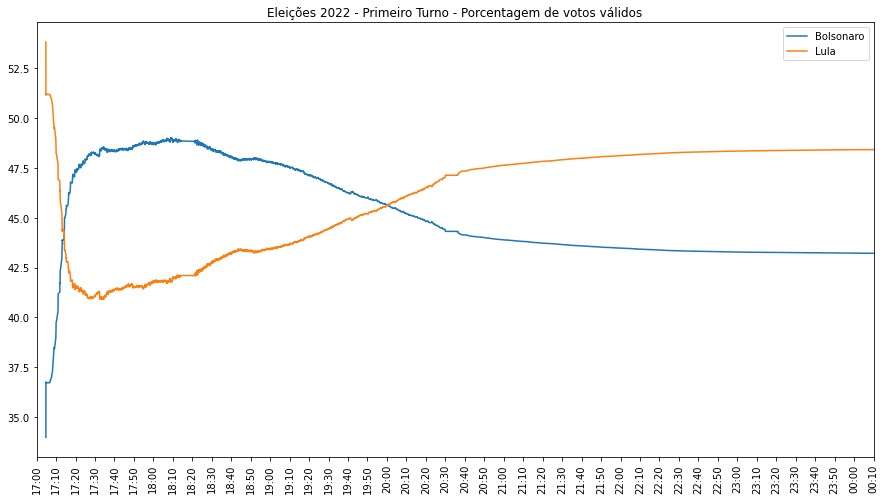

In [72]:
df = df_tot_1t
y1 = 'JAIR_BOLSONARO_PE_VOTOS_TOT_ACUMULADO        '
y2 = 'LULA_PE_VOTOS_TOT_ACUMULADO                  '

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(df.index, df[y1]*100, label='Bolsonaro')
ax.plot(df.index, df[y2]*100, label='Lula')

ax.set_xlim([pd.to_datetime('2022-10-02 17:00:00'), pd.to_datetime('2022-10-03 00:10:00')]);
datefmt = mdates.DateFormatter("%H:%M")
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
ax.xaxis.set_major_formatter(datefmt)
ax.xaxis.set_tick_params(labelrotation=90)

ax.set_title('Eleições 2022 - Primeiro Turno - Porcentagem de votos válidos')
ax.legend();

### Segundo turno - Totalização 

In [63]:
# dataframe totalização primeiro turno
df_tot_2t = pd.read_csv(f_hist_pres_2t, sep=sep, encoding=enc, decimal=dec)
df_tot_2t['data_hora'] = pd.to_datetime(df_tot_2t['DT_TOTALIZACAO     '], format='%d/%m/%Y %H:%M:%S') #
df_tot_2t.set_index('data_hora', inplace=True)
df_tot_2t.index.max() - df_tot_2t.index.min()

Timedelta('0 days 07:17:13')

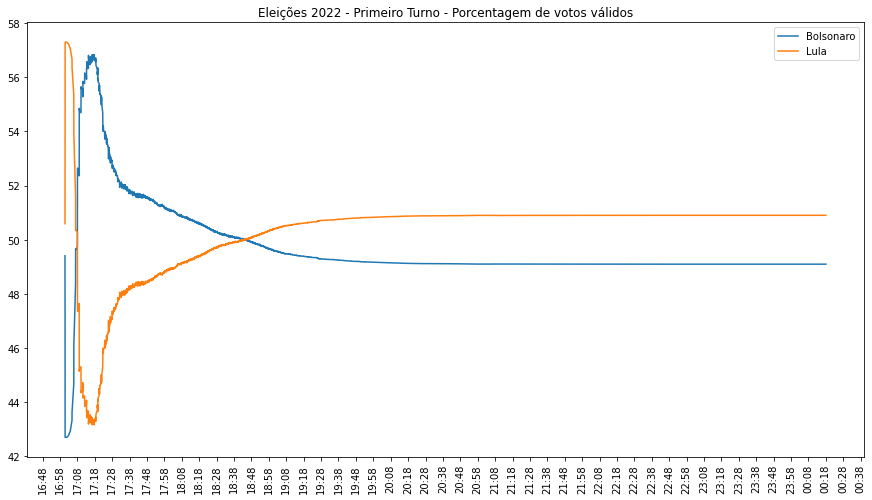

In [71]:
df = df_tot_2t
y1 = 'JAIR_BOLSONARO_PE_VOTOS_TOT_ACUMULADO        '
y2 = 'LULA_PE_VOTOS_TOT_ACUMULADO                  '

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(df.index, df[y1]*100,label='Bolsonaro')
ax.plot(df.index, df[y2]*100, label='Lula')

# ax.set_xlim([pd.to_datetime('2022-10-02 17:00:00'), pd.to_datetime('2022-10-03 00:10:00')]);
datefmt = mdates.DateFormatter("%H:%M")
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
ax.xaxis.set_major_formatter(datefmt)
ax.xaxis.set_tick_params(labelrotation=90)

ax.set_title('Eleições 2022 - Primeiro Turno - Porcentagem de votos válidos')
ax.legend();

### Votos por Seção - Primeiro Turno

In [76]:
# dataframe 
f_vot_secao = './tse_2022/votacao_secao_2022_BR/votacao_secao_2022_BR.csv'
df_secao = pd.read_csv(f_vot_secao, sep=sep, encoding=enc, decimal=dec)
df_secao.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_MUNICIPIO',
       'NM_MUNICIPIO', 'NR_ZONA', 'NR_SECAO', 'CD_CARGO', 'DS_CARGO',
       'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS', 'NR_LOCAL_VOTACAO',
       'SQ_CANDIDATO', 'NM_LOCAL_VOTACAO', 'DS_LOCAL_VOTACAO_ENDERECO'],
      dtype='object')

In [83]:
len(df_secao)

5380736

In [104]:
df_secao['NM_VOTAVEL'].unique()

array(['LUIZ INÁCIO LULA DA SILVA', 'JOSE MARIA EYMAEL',
       'LUIZ FELIPE CHAVES D AVILA', 'KELMON LUIS DA SILVA SOUZA',
       'VOTO BRANCO', 'SORAYA VIEIRA THRONICKE', 'CIRO FERREIRA GOMES',
       'SOFIA PADUA MANZANO', 'JAIR MESSIAS BOLSONARO',
       'SIMONE NASSAR TEBET', 'LEONARDO PÉRICLES VIEIRA ROQUE',
       'VOTO NULO', 'VERA LUCIA PEREIRA DA SILVA SALGADO'], dtype=object)

In [105]:
# primeiro turno
df_secao_1t = df_secao.query('NR_TURNO == 1')
len(df_secao_1t)

3529844

In [132]:
df_secao_1t['NM_VOTAVEL'].unique()

array(['LUIZ INÁCIO LULA DA SILVA', 'JOSE MARIA EYMAEL',
       'LUIZ FELIPE CHAVES D AVILA', 'KELMON LUIS DA SILVA SOUZA',
       'VOTO BRANCO', 'SORAYA VIEIRA THRONICKE', 'CIRO FERREIRA GOMES',
       'SOFIA PADUA MANZANO', 'JAIR MESSIAS BOLSONARO',
       'SIMONE NASSAR TEBET', 'LEONARDO PÉRICLES VIEIRA ROQUE',
       'VOTO NULO', 'VERA LUCIA PEREIRA DA SILVA SALGADO'], dtype=object)

In [124]:
# total de votos - primeiro turno
df_secao_1t[['NM_VOTAVEL','QT_VOTOS']].groupby(['NM_VOTAVEL']).sum().sort_values(by='QT_VOTOS',ascending=False)

,QT_VOTOS
NM_VOTAVEL,
LUIZ INÁCIO LULA DA SILVA,57259504
JAIR MESSIAS BOLSONARO,51072345
SIMONE NASSAR TEBET,4915423
CIRO FERREIRA GOMES,3599287
VOTO NULO,3487874
VOTO BRANCO,1964779
SORAYA VIEIRA THRONICKE,600955
LUIZ FELIPE CHAVES D AVILA,559708
KELMON LUIS DA SILVA SOUZA,81129


### Votos por Seção - Segundo Turno

In [106]:
# segundo turno
df_secao_2t = df_secao.query('NR_TURNO == 2')
len(df_secao_2t)

1850892

In [110]:
df_secao_2t['NM_VOTAVEL'].unique()

array(['LUIZ INÁCIO LULA DA SILVA', 'JAIR MESSIAS BOLSONARO', 'VOTO NULO',
       'VOTO BRANCO'], dtype=object)

In [125]:
# total de votos - primeiro turno
df_secao_2t[['NM_VOTAVEL','QT_VOTOS']].groupby(['NM_VOTAVEL']).sum().sort_values(by='QT_VOTOS',ascending=False)

,QT_VOTOS
NM_VOTAVEL,
LUIZ INÁCIO LULA DA SILVA,60345999
JAIR MESSIAS BOLSONARO,58206354
VOTO NULO,3930765
VOTO BRANCO,1769678


### Votos por Seção - estatística descritiva - Primeiro Turno

In [169]:
# JMB
df_secao_1t_jmb = df_secao.query('NR_TURNO==1 and NR_VOTAVEL==22')
df_secao_1t_jmb['QT_VOTOS'].describe()

count    471863.000000
mean        108.235537
std          48.747558
min           1.000000
25%          73.000000
50%         110.000000
75%         143.000000
max         535.000000
Name: QT_VOTOS, dtype: float64

In [170]:
# LILS
df_secao_1t_lils = df_secao.query('NR_TURNO==1 and NR_VOTAVEL==13')
df_secao_1t_lils['QT_VOTOS'].describe()

count    472023.000000
mean        121.306597
std          47.155582
min           1.000000
25%          86.000000
50%         116.000000
75%         152.000000
max         513.000000
Name: QT_VOTOS, dtype: float64

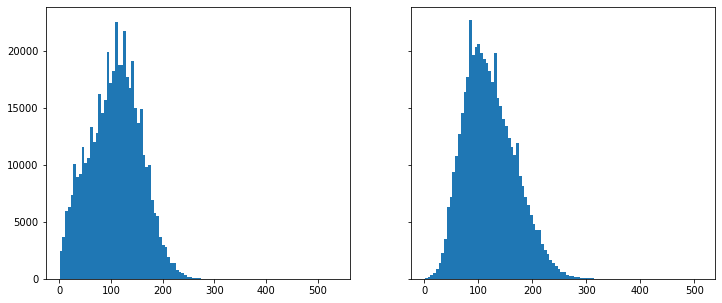

In [190]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(12,5))
axs[0].hist(df_secao_1t_jmb['QT_VOTOS'], bins=100);
axs[1].hist(df_secao_1t_lils['QT_VOTOS'], bins=100);

### Votos por Seção - estatística descritiva - Segundo Turno

In [173]:
# JMB
df_secao_2t_jmb = df_secao.query('NR_TURNO==2 and NR_VOTAVEL==22')
df_secao_2t_jmb['QT_VOTOS'].describe()

count    471884.000000
mean        123.348861
std          54.608497
min           1.000000
25%          84.000000
50%         127.000000
75%         162.000000
max         549.000000
Name: QT_VOTOS, dtype: float64

In [174]:
# LILS
df_secao_2t_lils = df_secao.query('NR_TURNO==2 and NR_VOTAVEL==13')
df_secao_2t_lils['QT_VOTOS'].describe()

count    472023.000000
mean        127.845463
std          48.249222
min           1.000000
25%          92.000000
50%         123.000000
75%         160.000000
max         530.000000
Name: QT_VOTOS, dtype: float64

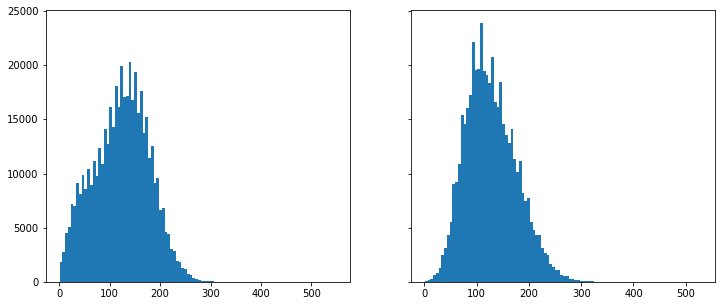

In [191]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(12,5))
axs[0].hist(df_secao_2t_jmb['QT_VOTOS'], bins=100);
axs[1].hist(df_secao_2t_lils['QT_VOTOS'], bins=100);